### 3. Задача раскраски графа

In [4]:
!install pulp

install: missing destination file operand after 'pulp'
Try 'install --help' for more information.


In [ ]:
import networkx as nx

# Создаем граф
G = nx.Graph()

# Добавляем вершины
G.add_nodes_from([1, 2, 3, 4, 5])

# Добавляем ребра
G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (4, 5)])

# Вызываем функцию для раскраски графа
colors = nx.greedy_color(G)

# Находим минимальное число цветов
min_colors = max(colors.values()) + 1

print("Минимальное число цветов:", min_colors)

Минимальное число цветов: 3


Какое минимальное количество цветов нужно, чтобы покрасить каждую вершину так, чтобы соседние вершины были разных цветов?

G = (V, E)

C = {1, ... , k}

E - матрица смежности, X - матрица раскраски графа

min y

сумма x v,c = 1

x v,c + xv2,c <= 1
y >= c*x v,c

для любых v, принадлежащих V и c, принадлежащих C

X v,c принадлежит {0;1}

In [ ]:
from pulp import *

# Создаем переменные
V = [1, 2, 3, 4, 5]  # Вершины графа
C = [1, 2, 3, 4]  # Цвета
X = LpVariable.dicts("X", (V, C), cat='Binary')  # Матрица раскраски графа

# Создаем модель линейного программирования
model = LpProblem("Graph Coloring Problem", LpMinimize)

# Добавляем целевую функцию
y = LpVariable('y')
model += y

# Добавляем ограничения
for v in V:
    model += lpSum([X[v][c] for c in C]) == 1  # Cумма X[v, c] = 1 для каждой вершины v

for v in V:
    for c in C:
        for u in V:
            if u != v:
                model += X[v][c] + X[u][c] <= 1  # X[v, c] + X[u, c] <= 1 для всех v, u и c

for v in V:
    for c in C:
        model += y >= c * X[v][c]  # y >= c * X[v, c] для всех v и c

# Решаем задачу
model.solve()

# Получаем минимальное количество цветов
min_colors = len(C)
for v in V:
    for c in C:
        if value(X[v][c]) == 1:
            min_colors = min(min_colors, c)

print("Минимальное количество цветов:", min_colors)

ModuleNotFoundError: ignored

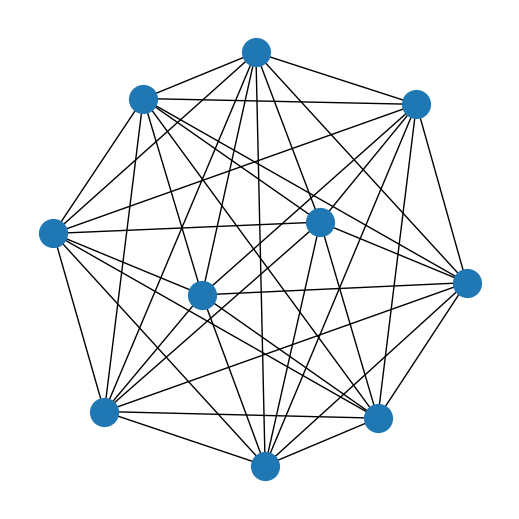

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
G = nx.turan_graph(10, 5)
pos = nx.spring_layout(G, scale=2, seed=902, iterations=100)
nx.draw(G, pos, node_size=400)
connect={}
coordinate = {}
nodes = []
for e in G.edges:
    connect[e[0]+1,e[1]+1]=1
    nodes.append(e[0]+1)
    nodes.append(e[1]+1)
    nodes= list(set(nodes))
N= len(nodes)
for n in G.nodes:
    coordinate[n+1,'X']=pos[n][0]
    coordinate[n+1,'Y']=pos[n][1]

plt.show()

In [ ]:
import numpy as np
adjacency_matrix = nx.adjacency_matrix(G)
E = adjacency_matrix.toarray()
print("Матрица смежности графа:")
print(E)

Матрица смежности графа:
[[0 0 1 1 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1 1 1]
 [1 1 0 0 1 1 1 1 1 1]
 [1 1 0 0 1 1 1 1 1 1]
 [1 1 1 1 0 0 1 1 1 1]
 [1 1 1 1 0 0 1 1 1 1]
 [1 1 1 1 1 1 0 0 1 1]
 [1 1 1 1 1 1 0 0 1 1]
 [1 1 1 1 1 1 1 1 0 0]
 [1 1 1 1 1 1 1 1 0 0]]


In [ ]:
! pip install pyomo

In [ ]:
!apt-get install -y -qq glpk-utils

Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 120895 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected package glpk-utils.
Preparing to unpack .../glpk-utils_5.0-1_amd64.deb ...
Unpacking glpk-utils (5.0-1) ...
Setting up libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4b

In [ ]:
from pyomo.environ import *
k = 5
model = AbstractModel()
model.c = RangeSet(5)
model.i = RangeSet(N)
model.j = Set(initialize=model.i)
model.U = Var(model.i,model.c, within=Binary)
model.Y = Var(model.c, bounds=(0,1), within=Reals)

def rule_1(model,i):
    return sum(model.U[i,c] for c in model.c) == 1
model.C1 = Constraint(model.i, rule=rule_1)

def rule_2(model,i,j,c):
    if (i,j) in connect:
        return model.U[i,c]+model.U[j,c]<= 1
    else:
        return Constraint.Skip
model.C2 = Constraint(model.i,model.j, model.c, rule=rule_2)

def rule_3(model,i,c):
    return model.U[i,c]<= model.Y[c]
model.C3 = Constraint(model.i, model.c, rule=rule_3)

def rule_4(model):
    return sum(model.Y[c] for c in model.c)
model.obj = Objective(rule= rule_4, sense=minimize)

solver = SolverFactory('glpk',executable='/usr/bin/glpsol')
instance = model.create_instance()
results = solver.solve(instance)
if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
    print('Выполнено')
elif (results.solver.termination_condition == TerminationCondition.infeasible):
    print('Не выполнено')
else:
    print ('Solver Status:',  results.solver.status)
print('Минимальное количество цветов', value(instance.obj))

ModuleNotFoundError: ignored

In [ ]:
for c in instance.c:
    print(c, value(instance.Y[c]))

1 1.0
2 1.0
3 1.0
4 1.0
5 1.0
